---
title: PCA of morphological traits
jupyter: python3
---


## Introduction

PCA is a dimensionality reduction and machine learning method used to simplify a large data set into a smaller set while still maintaining significant patterns and trends. PCA converts a set of observations of possibly correlated variables
into a set of values of linearly uncorrelated variables called principal components. These represent the
underlying structure in the data - the dimensions in which there is most variance (most difference) in the data.

It is widely used in paleobiology and evolutionary biology while scientists study the disparity of the clade of interest, for example, exploring the disparity of Cambrian and modern arthropods. In this kind of study, scientists are seeking to distill the fundamental variance in the anatomy of Cambrian and living species given a set of observations of the presence and absence of anatomical structures. The PCA will allow us to identify the dimensions in which these species exhibit the most variance. In effect, it allows us to create a multidimensional universe of ‘design space’, ‘morphological disparity’, or ‘morphospace’ in which similar organisms are grouped together and distanced from dissimilar organisms.

Here, we will try first do a case study on flower - the modern Iris Dataset. And if you are interested in PCA in paleo dataset, after this case study, you can explore the web [ClustVis](https://biit.cs.ut.ee/clustvis/) and try for a real dataset from [Wills (1994)](https://doi.org/10.1017/S009483730001263X) which characterizes the anatomy of Cambrian Burgess Shale and Modern arthropods (comprised of a suite of characters, like compound eyes, jointed appendages, antennae, etc, most of which are scored as either present or absent, or as different states describing the different manifestations of such structures).


## PCA on Iris Dataset

This example shows PCA on the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

This dataset is made of 4 features: sepal length, sepal width, petal length, petal width. We use PCA to project this 4 feature space into a three dimensional space.

### Loading the Iris dataset

The Iris dataset is directly available as part of [scikit-learn](https://scikit-learn.org/stable/#). It can be loaded using the sklearn.datasets.load_iris function (i.e., the load_iris function within the sklearn.datasets module).

With the default parameters,
a class object is returned, containing the data, the
target values, the feature names, and the target names.


In [1]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


### Plot of pairs of features of the Iris dataset

Let's first explore the relationships between the features of the Iris dataset by plotting pairwise scatter plots. This helps us visually assess the distribution of the data and the potential for dimensionality reduction before applying PCA.


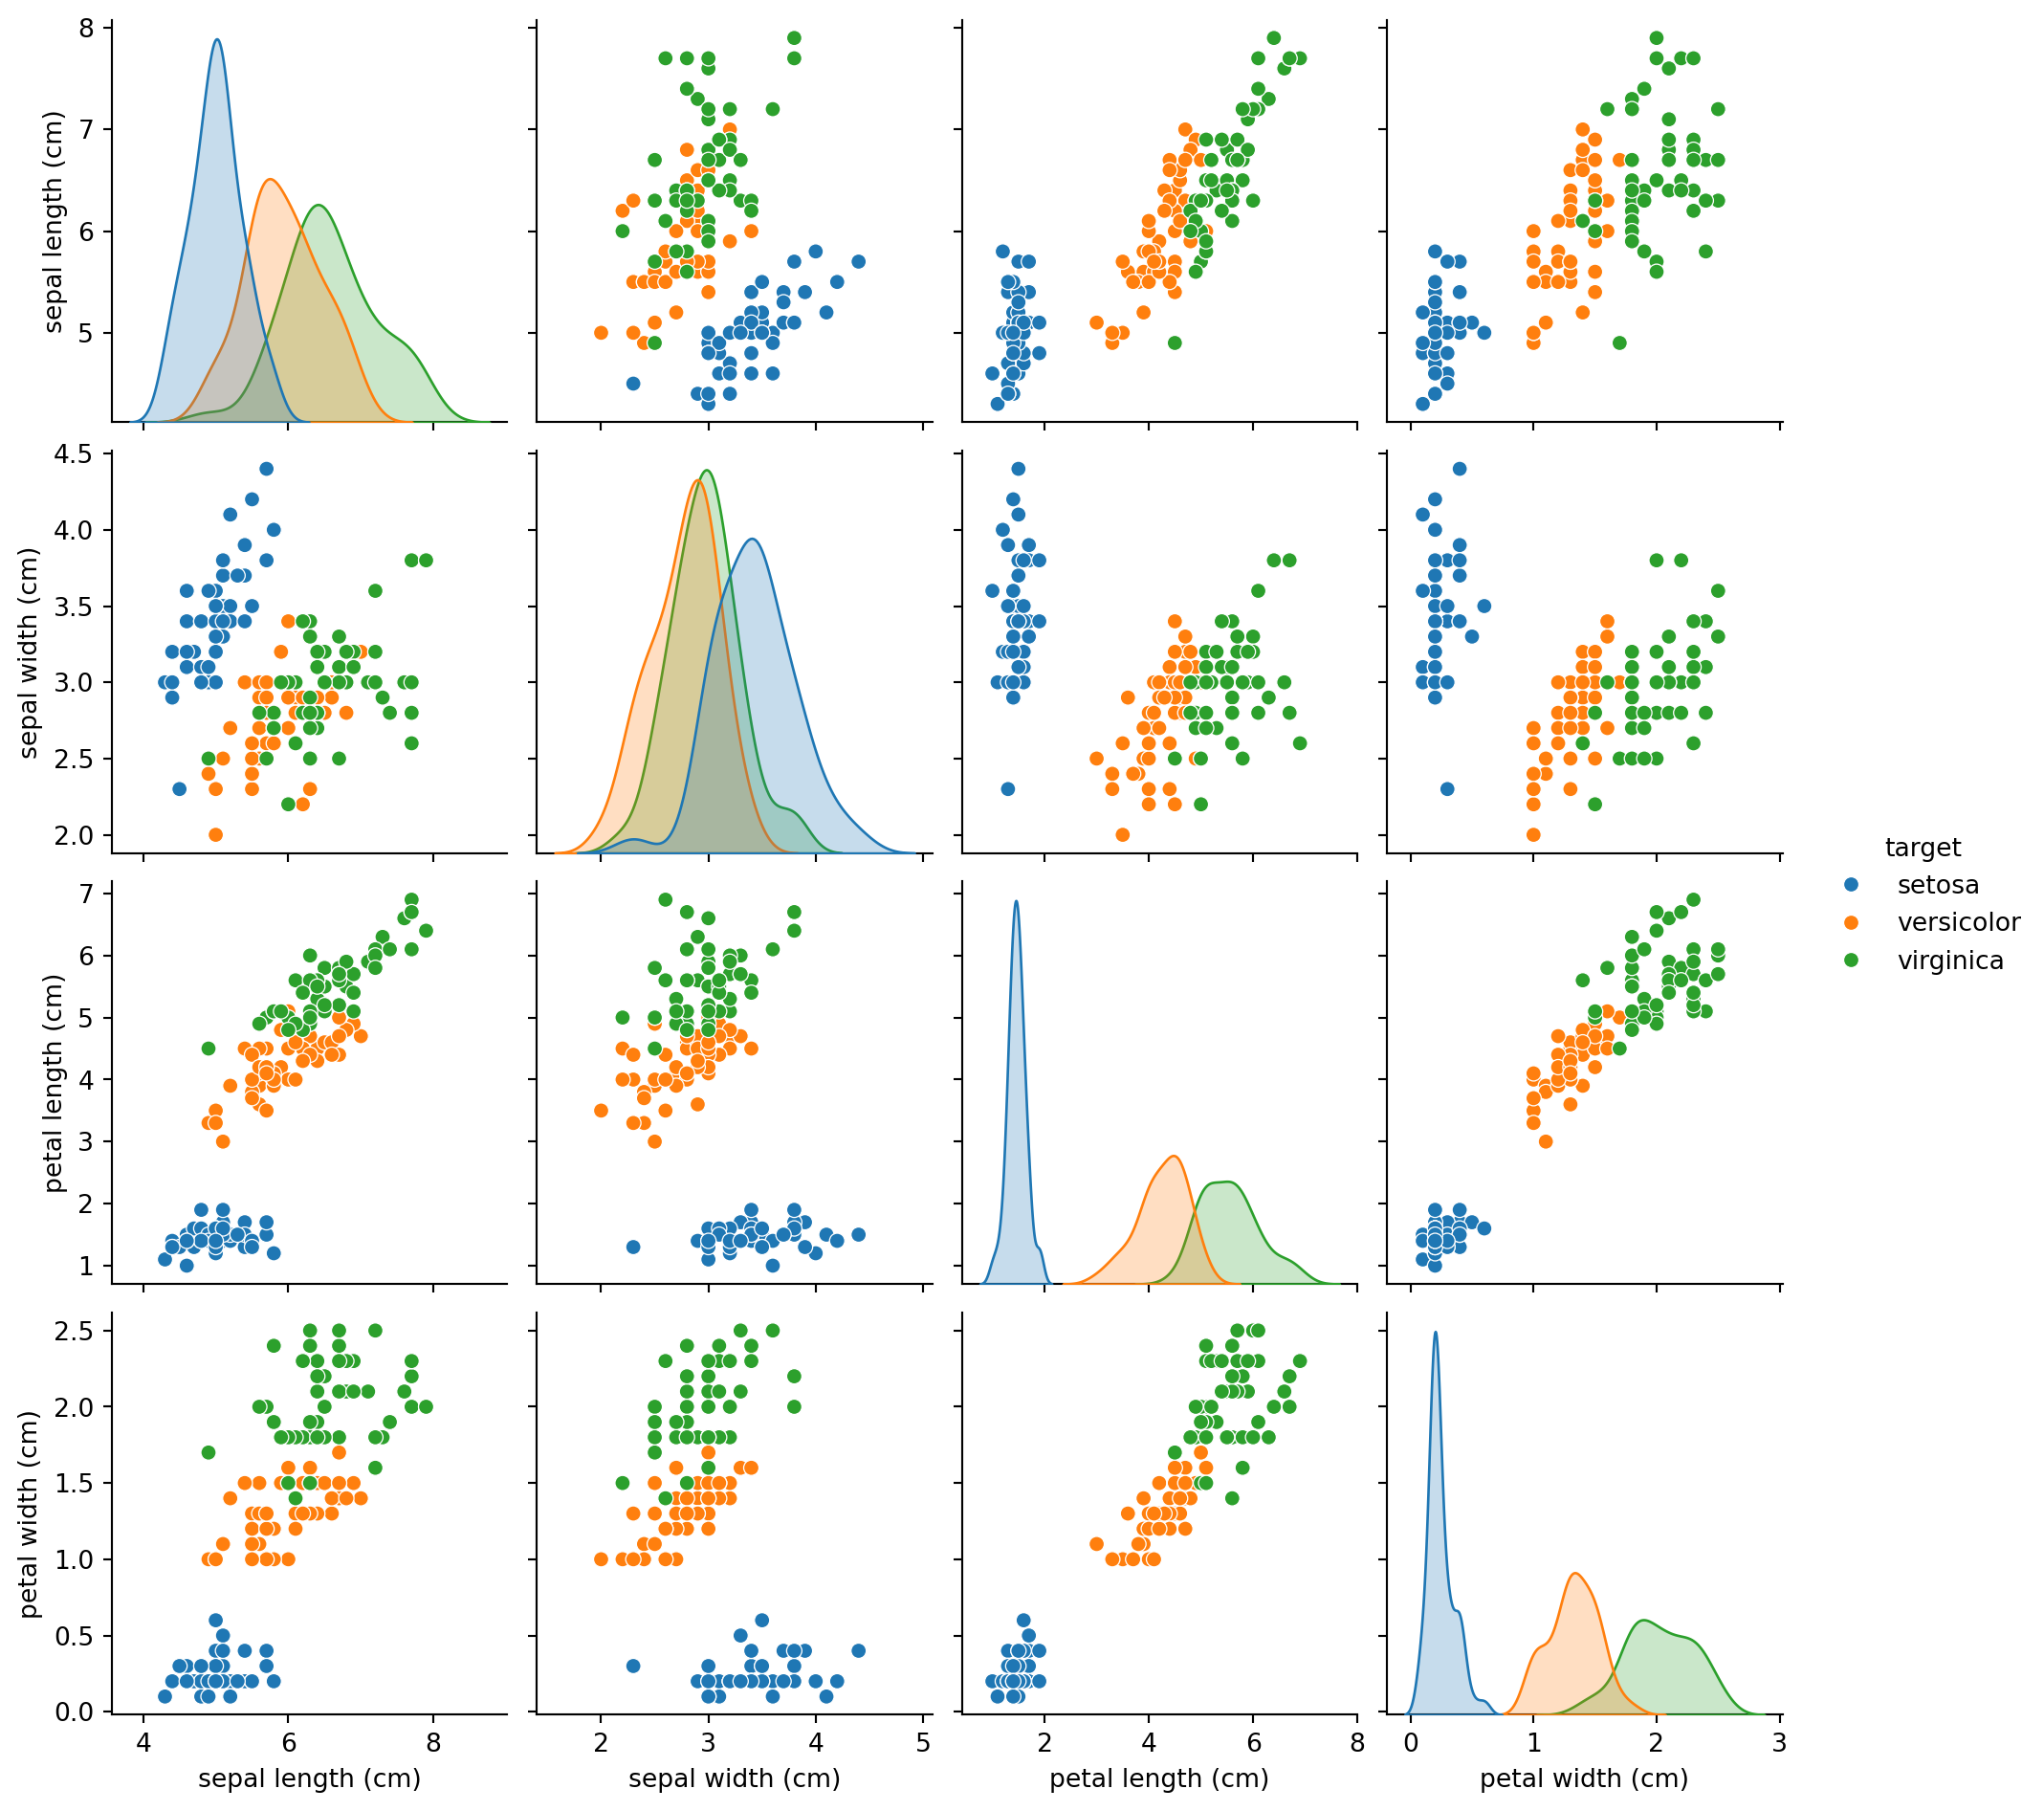

In [2]:
import seaborn as sns

# Rename classes using the iris target names
iris.frame["target"] = iris.target_names[iris.target]
_ = sns.pairplot(iris.frame, hue="target")

Each data point on each scatter plot refers to one of the 150 iris flowers in the dataset, with the color indicating their respective type (Setosa, Versicolor, and Virginica).

You can already see a pattern regarding the Setosa type, which is easily identifiable based on its short and wide sepal. Only considering these two dimensions, sepal width and length, there's still overlap between the Versicolor and Virginica types.

The diagonal of the plot shows the distribution of each feature. We observe that the petal width and the petal length are the most discriminant features for the three types.

### Plot a PCA representation

Now that we’ve seen the original feature relationships, let’s reduce the dimensionality of the dataset using PCA.

We’ll apply PCA to the Iris dataset and project the data onto its first three principal components.

This 3D scatter plot allows us to visualize how well the three Iris species can be separated in the reduced space.

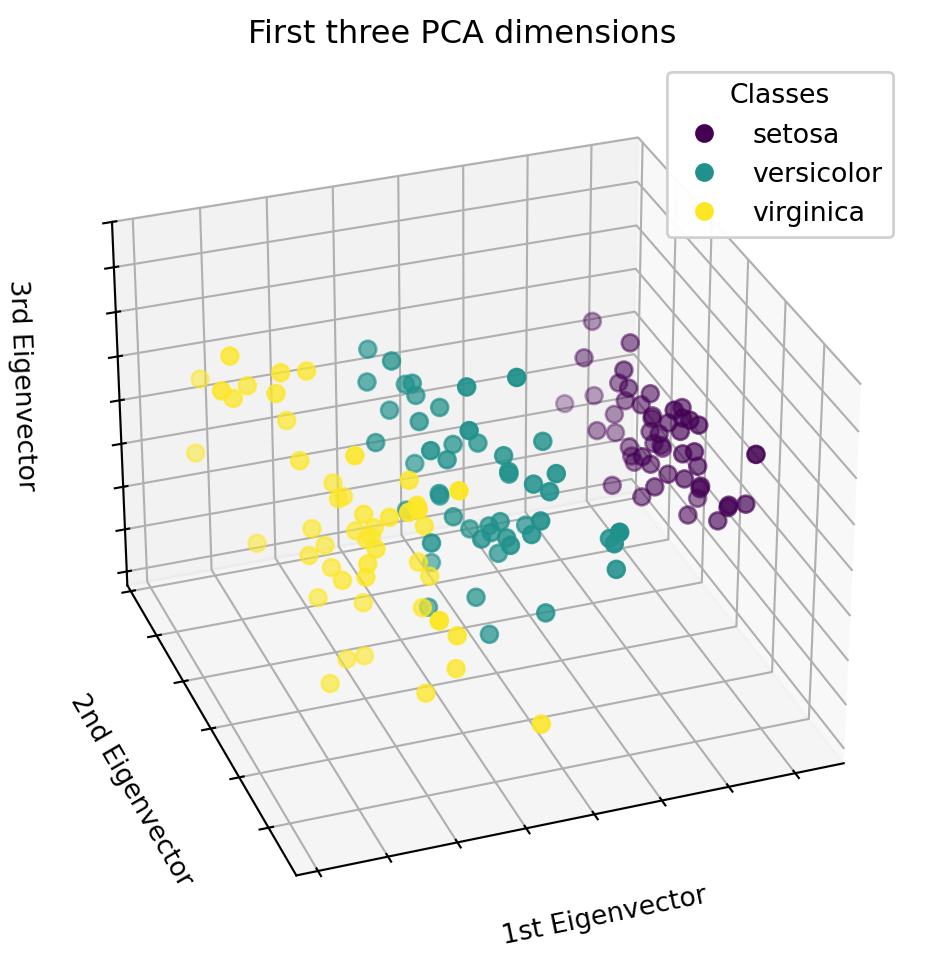

In [3]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

PCA will create 3 new features that are a linear combination of the 4 original
features. In addition, this transformation maximizes the variance. With this
transformation, we see that we can identify each species using only the first feature
(i.e., first eigenvector).
